In [1]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00


In [25]:
import os
import zipfile
import shutil
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Concatenate,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model, load_model, Sequential

In [ ]:
import zipfile

# Specify the path to the ZIP file
zip_file_path = '/content/drive/MyDrive/Capstone Project Huze/Dataset_fix.zip'

# Specify the directory where you want to extract the contents of the ZIP file
extract_dir = '/content'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Optional: List the extracted files
extracted_files = zip_ref.namelist()
print("Extracted files:")
for file in extracted_files:
    print(file)


In [34]:
# shutil.rmtree('/content/extracted_files')

In [4]:
train_dir_path = "/content/Dataset_fix/train_dir"
val_dir_path = "/content/Dataset_fix/validation_dir"
test_dir_path = "/content/Dataset_fix/test_dir"

In [5]:
target_size = (224,224)
batch_size = 128

TRAINING_DIR = train_dir_path
VALIDATION_DIR = val_dir_path
TEST_DIR = test_dir_path
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=target_size,
    class_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=target_size,
    class_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size
)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=target_size,
    class_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size
)

Found 8000 images belonging to 20 classes.
Found 1000 images belonging to 20 classes.
Found 1000 images belonging to 20 classes.


In [27]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(20, activation='softmax')(x)  # num_classes represents the number of classes in your task

model = Model(inputs=base_model.input, outputs=predictions)

In [30]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15
63/63 [==============================] - 171s 3s/step - loss: 0.9648 - accuracy: 0.6965 - val_loss: 0.7223 - val_accuracy: 0.7610
Epoch 2/15
63/63 [==============================] - 158s 3s/step - loss: 0.6806 - accuracy: 0.7730 - val_loss: 0.7495 - val_accuracy: 0.7580
Epoch 3/15
63/63 [==============================] - 157s 2s/step - loss: 0.6374 - accuracy: 0.7805 - val_loss: 0.6503 - val_accuracy: 0.7950
Epoch 4/15
63/63 [==============================] - 167s 3s/step - loss: 0.5912 - accuracy: 0.7971 - val_loss: 0.6353 - val_accuracy: 0.7910
Epoch 5/15
63/63 [==============================] - 159s 3s/step - loss: 0.5708 - accuracy: 0.8064 - val_loss: 0.6590 - val_accuracy: 0.7790
Epoch 6/15
63/63 [==============================] - 161s 3s/step - loss: 0.5304 - accuracy: 0.8196 - val_loss: 0.6419 - val_accuracy: 0.7910
Epoch 7/15
63/63 [==============================] - 154s 2s/step - loss: 0.5222 - accuracy: 0.8225 - val_loss: 0.6144 - val_accuracy: 0.7980
Epoch 8/15
63

In [32]:
# Specify the file path to save the weights
weights_path = '/content/weights xception.h5'

# Save the weights of the model
model.save_weights(weights_path)

In [10]:
tf.saved_model.save(model, "saved model")


In [17]:
shutil.copytree('/content/xception_15epoch_20class_v1','/content/drive/MyDrive/Capstone Project Huze/Model Percobaan/xception_ke-1_20classs_v1')

'/content/drive/MyDrive/Capstone Project Huze/Model Percobaan/xception_ke-1_20classs_v1'

In [31]:
history = model.fit(train_generator, epochs=1, validation_data=validation_generator)

63/63 [==============================] - 166s 3s/step - loss: 0.4366 - accuracy: 0.8472 - val_loss: 0.6323 - val_accuracy: 0.7950


In [36]:
# Make predictions on the test data
predictions = model.predict(test_generator)
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)


8/8 [==============================] - 10s 1s/step - loss: 0.6692 - accuracy: 0.7630


In [37]:
# Print the predicted labels for the first few samples
predicted_labels = predictions.argmax(axis=1)
print(predicted_labels[:10])

# Print the overall accuracy
print('Accuracy:', accuracy)

[ 7 10 19  4  0 18 13  6 19  1]
Accuracy: 0.7630000114440918


In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming 'true_labels' is an array of true labels for the test data
true_labels = test_generator.classes

# Convert the predicted probabilities into class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)


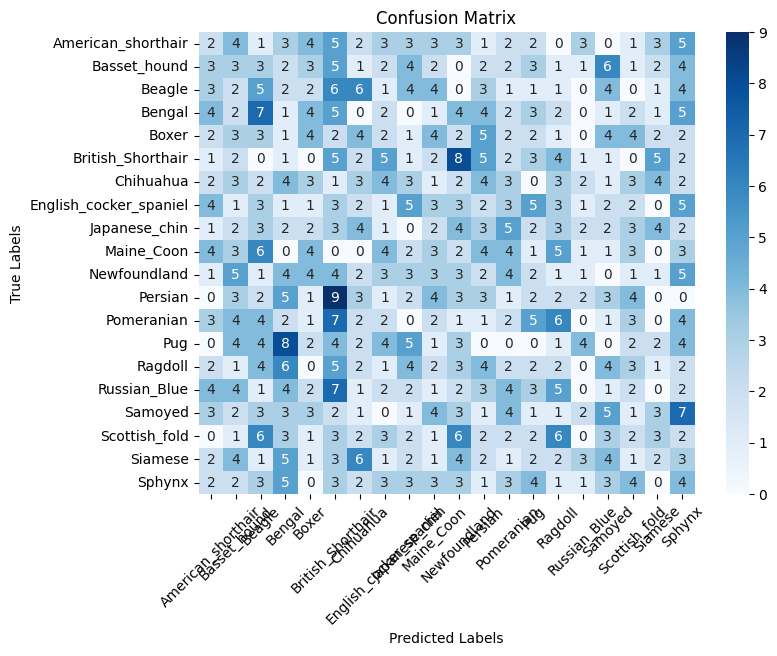

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the class labels for the confusion matrix
class_labels = test_generator.class_indices

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_labels, rotation=45)
ax.yaxis.set_ticklabels(class_labels, rotation=0)

# Show the plot
plt.show()
